In [1]:
# Generic Utilities 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Model of UE distribution Uniformly in a circular Cell of radius R 
# This Function Simulates the cdf of the model used

def simulate_cdf(seed,n_samples,rad):
    np.random.seed = seed
    # This Array Maintains list of X Coordinates of UE
    X = []
    # The corresponding y Coordinates
    y = []
    # Center of Cell (Cordinates of eNodeB)
    center = (rad,rad)
    R = rad
    # lambda_b denotes the intesity of distribution
    lambda_b = 1/(np.pi*R**2)
    print(lambda_b)
    # Generating Points for square Region (0,0) to (2R,2R)
    for i in range(n_samples):
        tup = np.random.uniform(low = 0.0, high = 2*rad, size = (2,1))
        X.append(tup[0,0])
        y.append(tup[1,0])
    # Ploting Base station range
    base_station_cover = plt.Circle((R,R),R,color = 'r',fill= False  )
    fig, ax = plt.subplots()

    ax.add_artist(base_station_cover)
    ax.scatter(X,y)
    ax.plot(rad,rad,'o',color='yellow')
    ax.annotate('Base Station',(rad,rad))
    ax.set_title('User Equipment Distribution')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    # Denotes number of points in the circle
    num_points_in_circle = 0
    i = 0 
    # List maintains points in the range of base staion
    points_in_circle = []
    for x in X:
        val = (x-center[0])**2 + (y[i]-center[1])**2
    
        if val  <= R**2:
            points_in_circle.append((x,y[i]))
            num_points_in_circle += 1
        i  = i+1 
        
    # The approach is as follows
    # Get total number of points in circle 
    # thus the probability of a point lying inside 
    #       a ring of radius x = number of points in ring/total number of points in circle
    # delta is the difference in radii of co-centric circles 
    delta = 5
    rings = np.arange(0,R,delta)[1:]
    # For each ring caculate probability
    # frequency lists the number of points inside rings
    frequency =  [0 for i in range(len(rings))]
    for num,ring in enumerate(rings):
        for point in points_in_circle:
            x = point[0]
            y = point[1]
            val = (x-center[0])**2 + (y-center[1])**2 
            if val - ring**2 <= 0:
                frequency[num] += 1

    # simulated value for each value       
    # cdf array finally contains probability for 
    cdf = np.divide(frequency, num_points_in_circle)

    # theoretical probaility = (x/R)^2

    theoretical = np.divide(np.square(rings),R**2)

    
    # Plot the results and compare with theoretical results
    fig2,ax2 = plt.subplots()
    #ax2.plot(rings,cdf)
    ax2.plot(rings,theoretical,'r')
    ax2.set_title("Cumulative Distribution Simulation")
    ax2.set_xlabel("Distance from base")
    ax2.set_ylabel("Probability of points within the ball")
    # Return lambda simulated results and points for future Usage
    return lambda_b,cdf,points_in_circle,center

3.183098861837907e-05
(39103, 2)
[0.00271079 0.01071529 0.02296499 0.04043168 0.06252717 0.09104161
 0.12377567 0.16195688 0.20446002 0.24944378 0.30240646]
0.01858169449914329
[0.0, 0.002, 0.004, 0.005999999999999999, 0.008, 0.01, 0.011999999999999999, 0.013999999999999999, 0.016, 0.018]


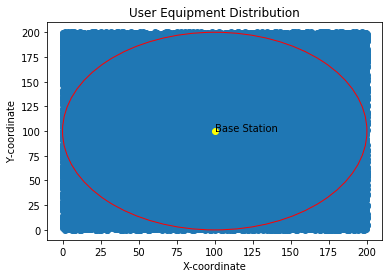

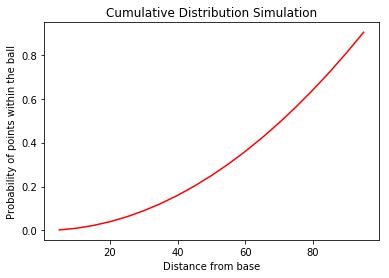

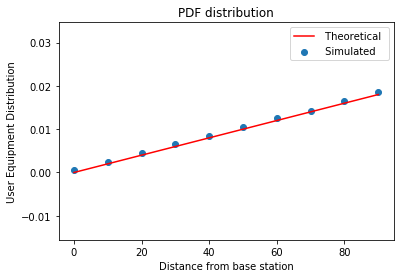

In [13]:
# Approach :
    # Measure the change in simulated cdf for diffrent x(distance from eNodeB) and divide by change in x
    # In this case chnage in value of x is constant

# This section contains pdf simulation
# call simulate cdf on seed = 0, 50000 UE and and a Range of 100 



rad = 100
lambda_b,cdf,circle,center = simulate_cdf(0,50000,100)

#print(np.shape(circle))
# returns NUmber of points within a ring of innner and outer radii x1 and x2 respectively 
def points_in(x1,x2,circle,center):
    numx1 = 0
    numx2 = 0
    for point in circle:
        x = point[0]
        y = point[1]
        dis = (x-center[0])**2 + (y-center[1])**2
        if dis <= x1**2:
            numx1 = numx1 + 1
        if dis <= x2**2:
            numx2 = numx2 + 1
    return numx2-numx1

# This list maintains change in cdf function called above for different x with a constant delta x of 5
# Note this value is quite small as compared to range of x
d_cdf = []
#print(cdf[0:11])
delta_cdf=[]

# This maintains vaules of x at which derivative is calculated
de = np.arange(0,rad,10)

dx = 5
  

for x in de:
        d_cdf.append(points_in(x,x+5,circle,center)/(np.shape(circle)[0]*dx))
        #------------pdf(x) = cdf(x+5) - cdf(x)-------------/dx(=5)
#print(d[-1])


theoretical_pdf = []
for x in de:
    theoretical_pdf.append(2*np.pi*x*lambda_b)

#print(theoretical_pdf)    

# Plot the results

fig3,ax3 = plt.subplots()
ax3.scatter(de,d_cdf,label = ' Simulated ')
ax3.plot(de,theoretical_pdf,'r',label = ' Theoretical ')
ax3.set_title("PDF distribution")
ax3.set_xlabel("Distance from base station")
ax3.set_ylabel("User Equipment Distribution")
ax3.legend(loc = 1)
plt.savefig('Distribution_pdf')

# PART B
#### This Part Contains the Simulation and Verification of diffrence in propagation delay of UE (difference in arrivel times of signals from UE )

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# This Fuction returns the propagation delay for each UE present in
def get_dist(points,center):
    # Maintains Distances for each UE
    distances = []
    c = 3*(10**2)
    for i,point_1 in enumerate(points):
        for j in range(i+1,len(points)):
            point_2 = circle[j]
            x1 = point_1[0]
            y1 = point_1[1]
        
            x2 = point_2[0]
            y2 = point_2[1]
        
                    
            dp1 = np.sqrt((x1-center[0])**2 + (y1-center[1])**2)
            dp2 = np.sqrt((x2-center[0])**2 + (y2-center[1])**2)
            dis = dp1-dp2
            distances.append(dis)
    distances = np.absolute(distances)
    # time = distance/speed of signal(=c)
    times = np.divide(distances,c)
    print(np.shape(times))
    return times



#########
# This Function returns cdf of propagation delay using observed values of the same
def get_cdf(times, rad,dx):
    #rnges maintains different time caps at which cdf is computed as 
    #number of propagation delays< range/total number of values observed 
    rnges= np.arange(0,rad,dx)[1:]
    times.sort()
    cdf = [0 for i in range(0,len(rnges))]
    j = 0
    last_index = 0 
    for k,rnge in enumerate(rnges):
        for ind,time in enumerate(times[last_index:]):
            if time <= rnge:
                cdf[k]+=1
            else:
                last_index += ind
                break
        if k != 0:
            cdf[k] += cdf[k-1]
    cdf = np.divide(cdf,len(times))
    return cdf 

# This function takes a set of points and returns number of pair of points having distances within the range rnge 

def dis_within(points,rnge,center):
    cnt = 0
    distances = []
    for i, point_1 in enumerate(points):
        for j in range(i+1,len(points)):
            point_2 = circle[j]
            x1 = point_1[0]
            y1 = point_1[1]
        
            x2 = point_2[0]
            y2 = point_2[1]
        
            dp1 = np.sqrt((x1-center[0])**2 + (y2-center[1])**2)
            dp2 = np.sqrt((x2-center[0])**2 + (y2-center[1])**2)
            dis = dp1-dp2
            distances.append(dis)
            if dis <= rnge:
                cnt+=1
    return cnt

In [6]:
# Simulation Starts

np.random.seed = 1
# X maintains the list X Ordinats of UE
# y The corresponding y oordinates
X = []
y = []
rad = 10
n_samples = 1000
center = (rad,rad)
R = rad
lambda_b = 1/(np.pi*R**2)



X = []
y = []
center = (rad,rad)
R = rad
lambda_b = 1/(np.pi*R**2)
# Generate Coordinates for UE
for i in range(n_samples):
    tup = np.random.uniform(low = 0.0, high = 2*rad, size = (2,1))
    X.append(tup[0,0])
    y.append(tup[1,0])


base_station_cover = plt.Circle((R,R),R,color = 'r',fill= False  )
"""
fig5,ax5 = plt.subplots(1,1,figsize=(10,10))

ax5.set_xlabel('X-coordinate')
ax5.set_ylabel('Y-coordinate')
ax5.set_title('User Equipment Distribution')

ax5.add_artist(base_station_cover)
ax5.scatter(X,y,label = 'User Equipments')

ax5.legend(loc = 1)

"""


i  = 0
# Points in circle 
num_points_in_circle = 0
points_in_circle = []
for x in X:
    val = (x-center[0])**2 + (y[i]-center[1])**2
    
    if val  <= R**2:
        points_in_circle.append((x,y[i]))
        num_points_in_circle += 1
    i  = i+1  

circle = points_in_circle
# Approach:
    # pdf = change in cdf/ change in (propagation delay)
# c is Signal Propagation speed due to limits posed by machine this value has been scaled 
c = 3*10**2

# value is the change of (change in propagation delay)
d_x = 0.01/c




(322003,)
[0.00023199 0.01226175 0.00469994 ... 0.00419618 0.01224706 0.01644324]


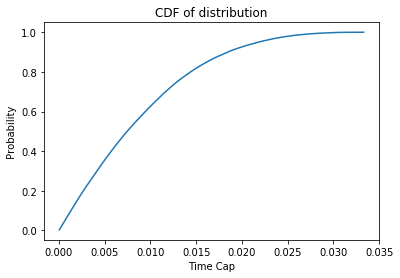

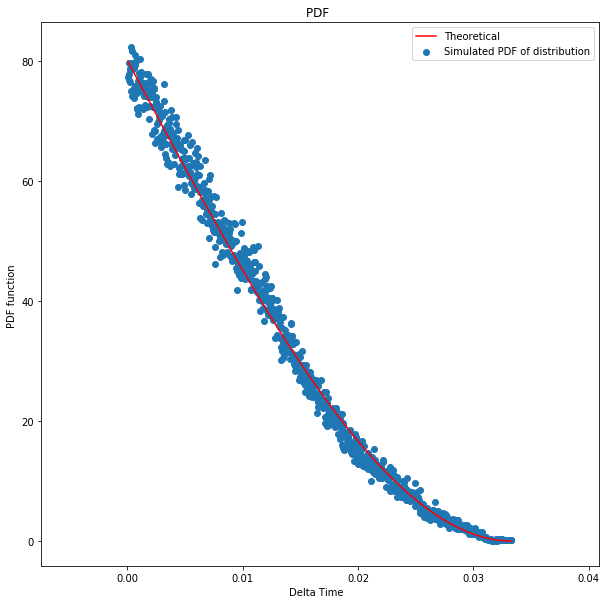

In [11]:

delta = np.arange(0,rad/c,d_x)[1:]
# delta maintains the list of valus at which we calculate pdf of distribution 
time = get_dist(circle,center)
#print(time)
# Get cdf values
cdf = get_cdf(time,rad/c,d_x)

# Plot the results
fig0,ax0 = plt.subplots()
ax0.plot(delta,cdf,label = 'simulated CDF')
ax0.set_xlabel('Time Cap')
ax0.set_ylabel(' Probability ')
ax0.set_title("CDF of distribution")

#plt.plot(delta,cdf)
# The theoretical Value derived using difference of Two random Variables
theoretical_arr = []

for y in delta:
    theoretical = (4/3)*(c/(rad**4))*( 2*rad**3 -3*c*(rad**2)*y + (c**3)*(y**3) )
    theoretical_arr.append(theoretical)

d_cdf = []
# Calculate change in cdf and append values in d_cdf array
for i,member in enumerate(cdf):
    if i != len(cdf)-1:
        d_cdf.append(cdf[i+1]-member)

# pdf = d_cdf/d_x
pdf = np.divide(d_cdf,d_x)

# Plot the Results 
fig,ax = plt.subplots(1,1,figsize = (10,10))

ax.scatter(delta[1:],pdf,label = 'Simulated PDF of distribution')
ax.plot(delta,theoretical_arr,color = 'red',label = 'Theoretical')
ax.set_title('PDF ')
ax.set_xlabel('Delta Time  ')
ax.set_ylabel('PDF function ')
ax.legend(loc = 1)
plt.savefig('delta.png')


In [8]:

"""
#for dif in delta:
#    c.append(dis_within(circle,dif)/(n_samples*(n_samples-1)/2))

fig1,ax1 = plt.subplots(1,1,figsize = (10,10))

ax1.plot(delta,cdf, label = ' Simulated ')
ax1.set_title(' CDF of Distribution')
ax1.set_xlabel(' Distances ')
ax1.set_ylabel(' Pairs of points ')
ax1.legend(loc = 1)

d_cdf = []

for i,member in enumerate(cdf):
    if i != len(cdf)-1:
        d_cdf.append(cdf[i+1]-member)

pdf = np.divide(d_cdf,d_x)

fig,ax = plt.subplots(1,1,figsize = (10,10))

ax.plot(delta[1:],pdf,label = 'Simulated PDF of distribution')
ax.set_title('PDF ')
ax.set_xlabel('Distance ')
ax.set_ylabel('PDF function ')
ax.legend(loc = 1)
"""

"\n#for dif in delta:\n#    c.append(dis_within(circle,dif)/(n_samples*(n_samples-1)/2))\n\nfig1,ax1 = plt.subplots(1,1,figsize = (10,10))\n\nax1.plot(delta,cdf, label = ' Simulated ')\nax1.set_title(' CDF of Distribution')\nax1.set_xlabel(' Distances ')\nax1.set_ylabel(' Pairs of points ')\nax1.legend(loc = 1)\n\nd_cdf = []\n\nfor i,member in enumerate(cdf):\n    if i != len(cdf)-1:\n        d_cdf.append(cdf[i+1]-member)\n\npdf = np.divide(d_cdf,d_x)\n\nfig,ax = plt.subplots(1,1,figsize = (10,10))\n\nax.plot(delta[1:],pdf,label = 'Simulated PDF of distribution')\nax.set_title('PDF ')\nax.set_xlabel('Distance ')\nax.set_ylabel('PDF function ')\nax.legend(loc = 1)\n"

# Part B